# Práctica 1. Asteroides peligrosos

### Objetivo 

La NASAquiere crear un modelo que permita saber si un asteroide es peligroso para el planeta Tierra o no. Para ello, tendremos en cuenta  el lugar que ocupan en un espacio n-dimensional donde n es el número de características de cada asteroide. 
Para ello usaremos el dataset “nasa.csv” que se encuentra en Moodle. Elige el clasificador que más se adapte de entre los vistos en clase y usa scikit-learn junto con las librerías que necesites para resolver las siguientes cuestiones.Muestra todos los resultadosdel algoritmopaso a paso.

### Cuestiones 

1)Haz todo el preprocesamiento para crear un set de entrenamiento y otro de validación qué permita clasificar asteroides qué tengan sólo las características necesarias. Usaremos como atributos todos los del dataset excepto “Orbiting Body” y “Equinox”. Explica qué has hecho y porqué. (0,5 puntos)

2)Prueba con distintas configuraciones de las dos métricas principales. La primera métrica corresponde al número de individuos que usarás para clasificar una nueva instancia y la segunda cómo vas a medir la cercanía de esa nueva instancia con el resto.¿Qué decisiones has tomado? ¿Por qué?(1 punto)

3)Elige  la  mejor  configuración  entre  las  anteriores.  Para  ello  dibuja  una  tabla  ver  cómo  evoluciona  la clasificación.  Dibuja  los  resultados  que  se  obtienen  con  ambas  configuraciones elegidas  cómo  las mejores. (1 punto) 

4)Utiliza  el  clasificador  para  saber  que ocurre  con  los  asteroides  deundataset que  se  llame “nasa_clasificar.csv” que obtendremos del dataset proporcionado.(0,5 puntos)

#### Librerias

In [111]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn import metrics
from sklearn import neighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedKFold
from IPython.display import clear_output
import random
from pylab import *

#### Funciones

In [112]:
"""
Función para, dado un dataset, encontrar el parámetro K óptimo para un modelo de clasificación 
basado en KNeighbors.
    @param x_train: Conjunto de entrenamiento (x).
    @param x_test: Conjunto de pruebas (x).
    @param y_train: Conjunto de entrenamiento(y).
    @param y_test: Conjunto de pruebas (y).
    @param patient: Veces que aguanta el algoritmos sin parar cuando se cumple la condición de finalizacióm stop.
    @param stop: Mejora a partir de la cual se para el algoritmo.
    @param metrica_distancia: Métrica para medir la distancia entre puntos.
"""
def CrearModeloKNeighborsKOptima(x_train, x_test, y_train, y_test, stop, patient, metrica_distancia):
    
    # Array de precisión en la predicción sobre el conjunto de validación.
    precisiones = [0]

    # Array de errores en la predicción sobre el conjunto de validación.
    errores = [100]
    
    # K inicial.
    k = 1
    
    # Variable de finalización.
    terminado = False
    
    # Precisión de K-1.
    precision_ant = 0

    # Bucle de búsqueda de la mejor 
    while terminado is False:
        
        # Creación del modelo.
        model = KNeighborsClassifier(n_neighbors=k, metric=metrica_distancia)
        model.fit(x_train, y_train)
        
        # Cálculo de la precisión y el error.
        precision = round(accuracy_score(model.predict(x_test), y_test), 3) *100 
        error = round(100 - precision, 3) 
        precisiones.append(precision)
        errores.append(error)
        
        # Comprobación de la condición de finalización del algoritmo.
        if (precision - precision_ant) < stop:
            if patient != 0:
                # Se cumple la condición de finalización pero todavía hay paciencia, el algoritmo sigue.
                patient -= 1
                precision_ant = precision
                k += 1
            else:
                # Ya no hay paciencia, se acaba el algoritmo.
                terminado = True
        else:
            # Continua el algoritmo.
            precision_ant = precision
            k += 1

    # Composición dela gráfica de progreso del error y la precisión.
    fig, ax1 = subplots(figsize=(20, 10))
    ax1.plot(precisiones, label='Precisión', color='g', marker='o')
    ax1.plot(errores, label='Error', color='r', marker='o', )
    fig.suptitle('Evolución de la precisión/error según K', fontsize=20)
    plt.xlabel('K')
    plt.ylabel("Porcentaje")
    axes = plt.gca()
    axes.set_xlim([0, k])
    axes.set_ylim([0,100])
    legend(loc='upper left')
    ax1.grid(True)
    
    # Mostramos la gráfica de progreso del error y la precisión.
    plt.show()
    
    # Imprimirmos por pantalla el resultado de la búsqueda.
    print("El parámetro K recomendado es: " + str(k) + " con un " + str(precisiones[k-1]) + "% de precisión"
         + " para la métrica: " + metrica_distancia)

"""
Función para, dada una predicción, devolver una tabla con el % de probabilidad de cada medalla.
    @param resultados: Array de probabilidades predecidas.
    @param show: Indica si se muestra la tabla de resultados desde la misma función.
    @return: Devuelve la tabla con el % de probabilidad de cada medalla.
"""
def PredecirAsteroide(resultados, show = True):
    
    # Tabla de resultados.
    resultado = pd.DataFrame()
    
    # Posibles medallas (incluye ninguna).
    resultado["Hazardous"] = [True, False]

    porcentajes = []
    
    # Colocamos cada porcentaje en la celda correspondiente.
    for medalla in [True, False]:
        porcentajes.append(round(resultados[encoderH.transform([medalla])[0]] * 100, 1))

    resultado["%"] = porcentajes
    
    # Mostramos la tabla si así se indica.
    if show:
        display(resultado)
        
    return resultado

#### Dirección del dataset

In [113]:
DIR_DATASET = "Recursos Lab 3/nasa.csv"

## 1. Preparación del dataset

Cargamos el dataset

In [114]:
Datos = pd.read_csv(DIR_DATASET)
Datos.head()

,Neo Reference ID,Name,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),...,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Equinox,Hazardous
0,3703080,3703080,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,...,314.373913,609.599786,0.808259,57.257470,2.005764,2.458162e+06,264.837533,0.590551,J2000,True
1,3723955,3723955,21.3,0.146068,0.326618,146.067964,326.617897,0.090762,0.202951,479.225620,...,136.717242,425.869294,0.718200,313.091975,1.497352,2.457795e+06,173.741112,0.845330,J2000,False
2,2446862,2446862,20.3,0.231502,0.517654,231.502122,517.654482,0.143849,0.321655,759.521423,...,259.475979,643.580228,0.950791,248.415038,1.966857,2.458120e+06,292.893654,0.559371,J2000,True
3,3092506,3092506,27.4,0.008801,0.019681,8.801465,19.680675,0.005469,0.012229,28.876199,...,57.173266,514.082140,0.983902,18.707701,1.527904,2.457902e+06,68.741007,0.700277,J2000,False
4,3514799,3514799,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,...,84.629307,495.597821,0.967687,158.263596,1.483543,2.457814e+06,135.142133,0.726395,J2000,True


### 1.1. Preprocesamiento del dataset

Eliminamos las columnas que no nos aportan información para nuestro caso de uso

In [115]:
del Datos["Orbiting Body"]
del Datos["Equinox"]

Datos.head()

,Neo Reference ID,Name,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),...,Inclination,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Hazardous
0,3703080,3703080,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,...,6.025981,314.373913,609.599786,0.808259,57.257470,2.005764,2.458162e+06,264.837533,0.590551,True
1,3723955,3723955,21.3,0.146068,0.326618,146.067964,326.617897,0.090762,0.202951,479.225620,...,28.412996,136.717242,425.869294,0.718200,313.091975,1.497352,2.457795e+06,173.741112,0.845330,False
2,2446862,2446862,20.3,0.231502,0.517654,231.502122,517.654482,0.143849,0.321655,759.521423,...,4.237961,259.475979,643.580228,0.950791,248.415038,1.966857,2.458120e+06,292.893654,0.559371,True
3,3092506,3092506,27.4,0.008801,0.019681,8.801465,19.680675,0.005469,0.012229,28.876199,...,7.905894,57.173266,514.082140,0.983902,18.707701,1.527904,2.457902e+06,68.741007,0.700277,False
4,3514799,3514799,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,...,16.793382,84.629307,495.597821,0.967687,158.263596,1.483543,2.457814e+06,135.142133,0.726395,True


#### 1.2 Limpiamos los campos que son nulos.
Contamos los campos nulos por cada columna

In [116]:
nulos = pd.DataFrame(Datos.isnull().sum(), columns=["Número de nulos"])
nulos

,Número de nulos
Neo Reference ID,0
Name,0
Absolute Magnitude,0
Est Dia in KM(min),0
Est Dia in KM(max),0
Est Dia in M(min),0
Est Dia in M(max),0
Est Dia in Miles(min),0
Est Dia in Miles(max),0
Est Dia in Feet(min),0


No existen datos nulos, por lo que no se necesita realizar ninguna modificación de los datos en este sentido

### Transformación del dataset
#### Transformamos los atributos categóricos a numéricos.

In [117]:
lista = nulos.index #Utilizamos nulos para saber cuales son los indices
Type = []
for x in lista:
    Type.append([x,Datos[x].dtypes,Datos[x][0]])
Type = pd.DataFrame(Type, columns=["Index","Tipo de datos","Ejemplo"])
Type

1995-01-01


,Index,Tipo de datos,Ejemplo
0,Neo Reference ID,int64,3703080
1,Name,int64,3703080
2,Absolute Magnitude,float64,21.6
3,Est Dia in KM(min),float64,0.12722
4,Est Dia in KM(max),float64,0.284472
5,Est Dia in M(min),float64,127.22
6,Est Dia in M(max),float64,284.472
7,Est Dia in Miles(min),float64,0.0790507
8,Est Dia in Miles(max),float64,0.176763
9,Est Dia in Feet(min),float64,417.388


Comprobamos que variables no son numericas y las transformamos a continuación

In [118]:
# Transformación a datos numéricos de la columna "Close Approach Date".
encoderCAD = preprocessing.LabelEncoder()
encoderCAD.fit(Datos["Close Approach Date"])
Datos["Close Approach Date"] = encoderCAD.transform(Datos["Close Approach Date"])

# Transformación a datos numéricos de la columna "Orbit Determination Date".
encoderODD = preprocessing.LabelEncoder()
encoderODD.fit(Datos["Orbit Determination Date"])
Datos["Orbit Determination Date"] = encoderODD.transform(Datos["Orbit Determination Date"])

# Transformación a datos numéricos de la columna "Hazardous".
encoderH = preprocessing.LabelEncoder()
encoderH.fit(Datos["Hazardous"])
Datos["Hazardous"] = encoderH.transform(Datos["Hazardous"])

# Mostramos el dataset.
Datos.head()

,Neo Reference ID,Name,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),...,Inclination,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Hazardous
0,3703080,3703080,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,...,6.025981,314.373913,609.599786,0.808259,57.257470,2.005764,2.458162e+06,264.837533,0.590551,1
1,3723955,3723955,21.3,0.146068,0.326618,146.067964,326.617897,0.090762,0.202951,479.225620,...,28.412996,136.717242,425.869294,0.718200,313.091975,1.497352,2.457795e+06,173.741112,0.845330,0
2,2446862,2446862,20.3,0.231502,0.517654,231.502122,517.654482,0.143849,0.321655,759.521423,...,4.237961,259.475979,643.580228,0.950791,248.415038,1.966857,2.458120e+06,292.893654,0.559371,1
3,3092506,3092506,27.4,0.008801,0.019681,8.801465,19.680675,0.005469,0.012229,28.876199,...,7.905894,57.173266,514.082140,0.983902,18.707701,1.527904,2.457902e+06,68.741007,0.700277,0
4,3514799,3514799,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,...,16.793382,84.629307,495.597821,0.967687,158.263596,1.483543,2.457814e+06,135.142133,0.726395,1


### 2. Creación del modelo KNN
#### 2.1 Cálculo de la mejor variable K para el clasificador
Separamos del dataset completo el conjunto de variables para predecir y el valor esperado

In [119]:
# Copia del dataset original.
x_dataset = Datos.copy()

# Separamos la columna del valor esperado de la predicción.
y_dataset = x_dataset["Hazardous"]
del x_dataset["Hazardous"]

# Reseteamos el índice del dataset.
x_dataset = x_dataset.reset_index(drop=True)

# Mostramos la cabeza del dataset.
x_dataset.head()

,Neo Reference ID,Name,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),...,Semi Major Axis,Inclination,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion
0,3703080,3703080,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,...,1.407011,6.025981,314.373913,609.599786,0.808259,57.257470,2.005764,2.458162e+06,264.837533,0.590551
1,3723955,3723955,21.3,0.146068,0.326618,146.067964,326.617897,0.090762,0.202951,479.225620,...,1.107776,28.412996,136.717242,425.869294,0.718200,313.091975,1.497352,2.457795e+06,173.741112,0.845330
2,2446862,2446862,20.3,0.231502,0.517654,231.502122,517.654482,0.143849,0.321655,759.521423,...,1.458824,4.237961,259.475979,643.580228,0.950791,248.415038,1.966857,2.458120e+06,292.893654,0.559371
3,3092506,3092506,27.4,0.008801,0.019681,8.801465,19.680675,0.005469,0.012229,28.876199,...,1.255903,7.905894,57.173266,514.082140,0.983902,18.707701,1.527904,2.457902e+06,68.741007,0.700277
4,3514799,3514799,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,...,1.225615,16.793382,84.629307,495.597821,0.967687,158.263596,1.483543,2.457814e+06,135.142133,0.726395


In [120]:
x_dataset, x_validacion, y_dataset, y_validacion = train_test_split(x_dataset, y_dataset, stratify=y_dataset, test_size=0.01)

## 3. Buscamos el mejor parámetro K y la mejor métrica para el clasificador


Probando división: 0.3
-----


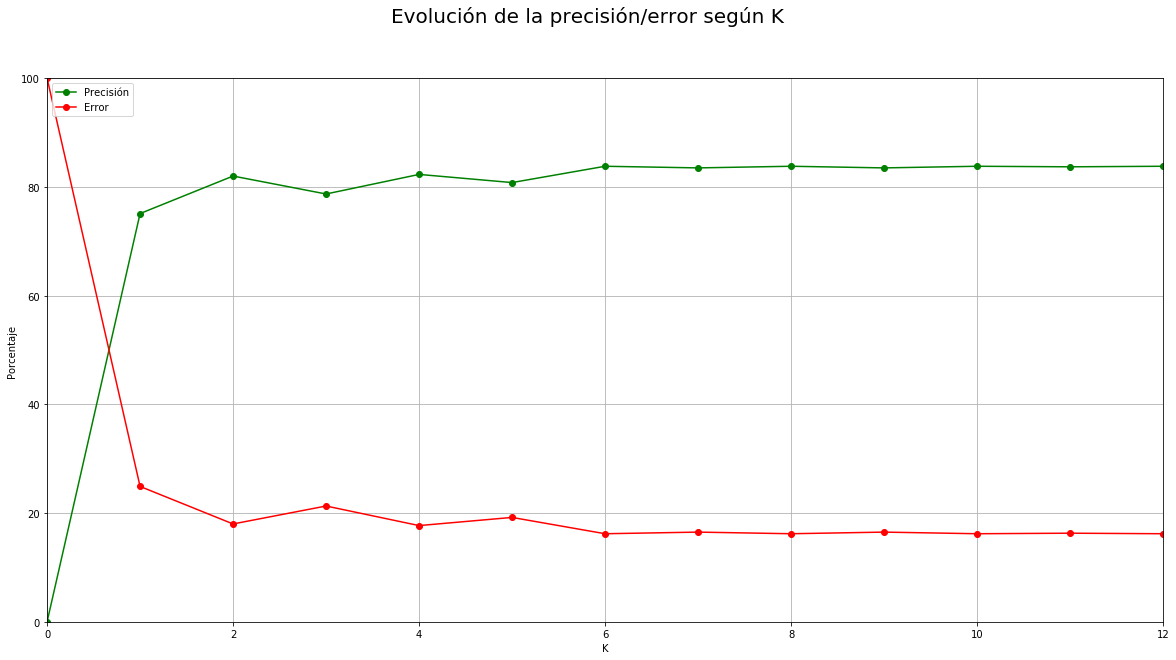

El parámetro K recomendado es: 12 con un 83.7% de precisión para la métrica: euclidean


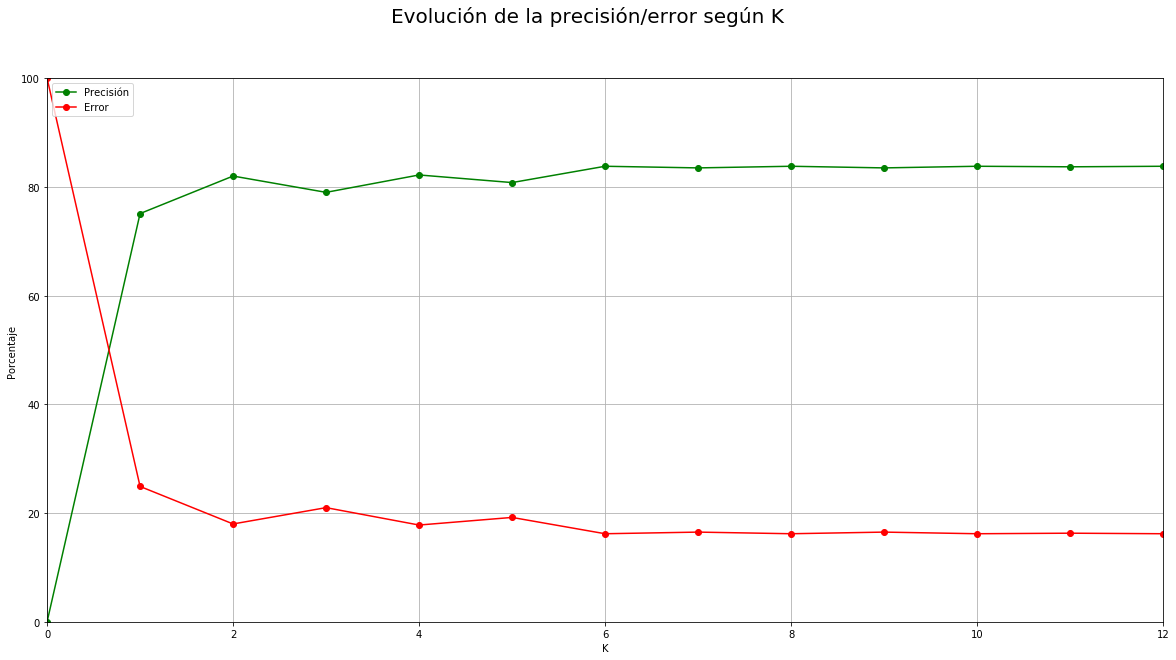

El parámetro K recomendado es: 12 con un 83.7% de precisión para la métrica: manhattan


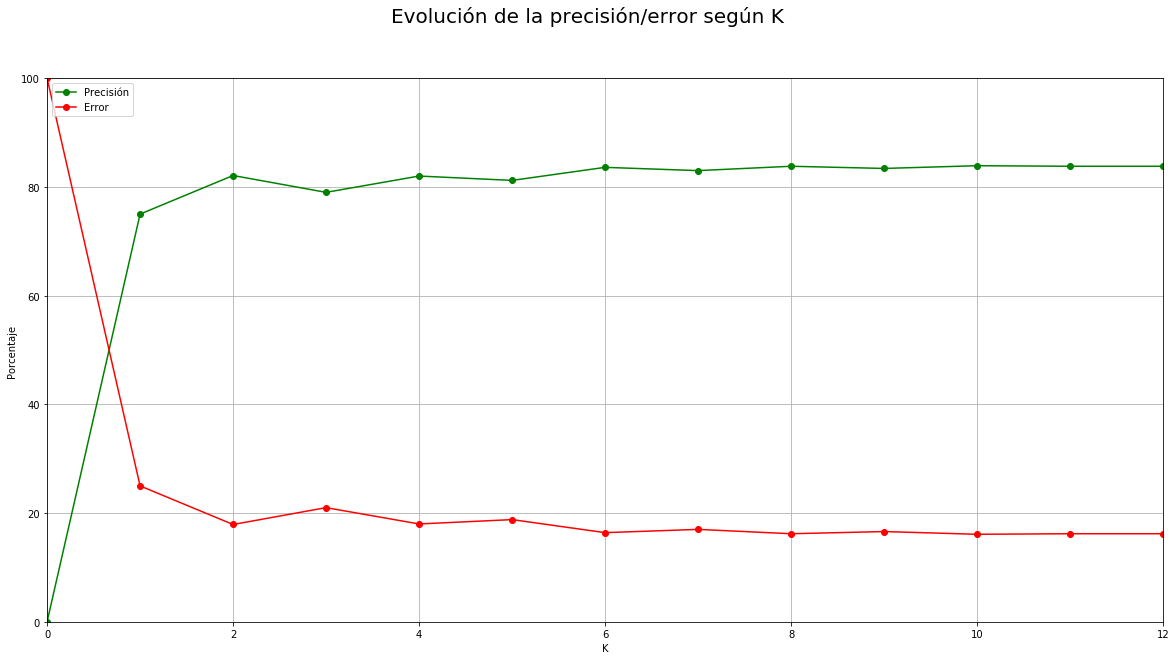

El parámetro K recomendado es: 12 con un 83.8% de precisión para la métrica: chebyshev
############################################################################

Probando división: 0.25
-----


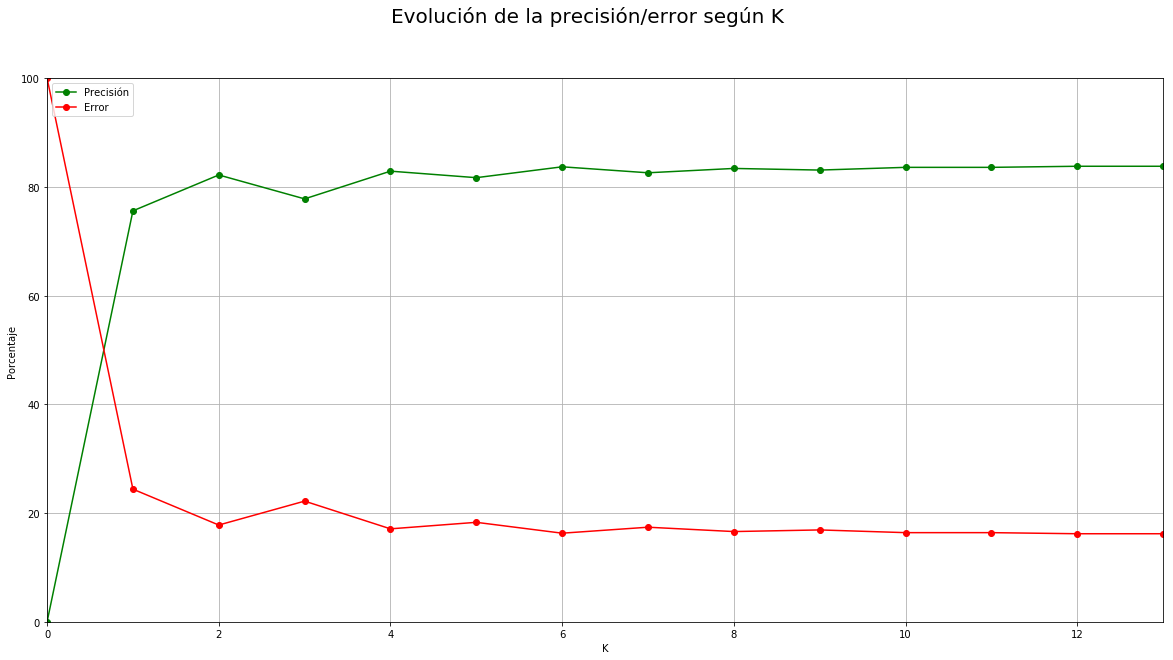

El parámetro K recomendado es: 13 con un 83.8% de precisión para la métrica: euclidean


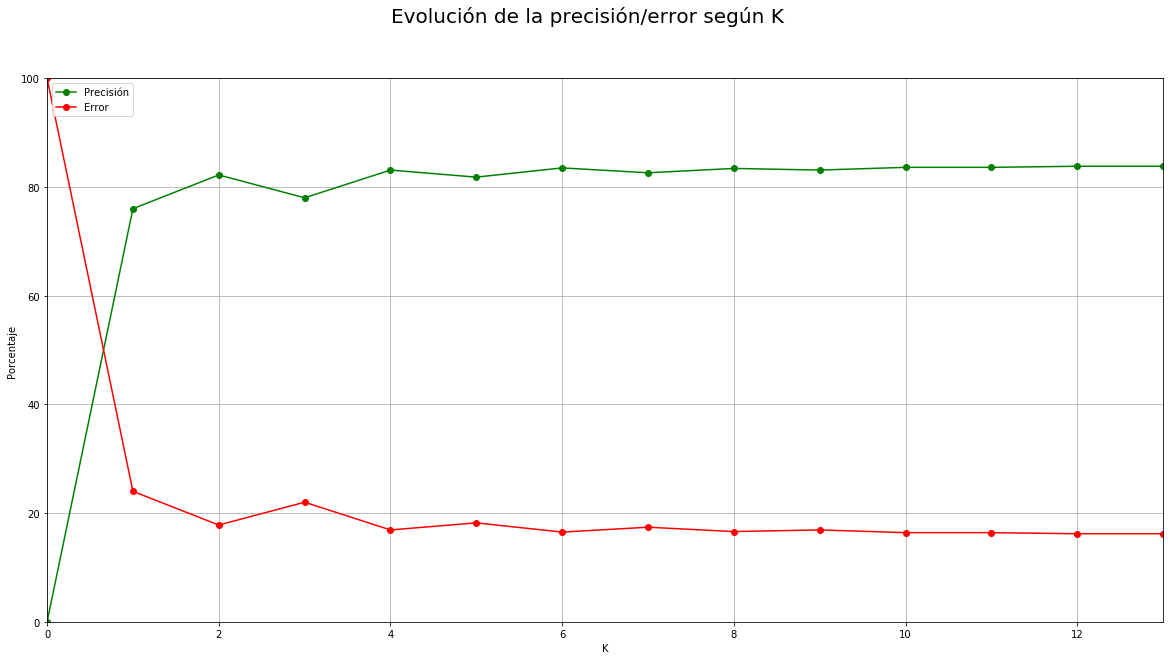

El parámetro K recomendado es: 13 con un 83.8% de precisión para la métrica: manhattan


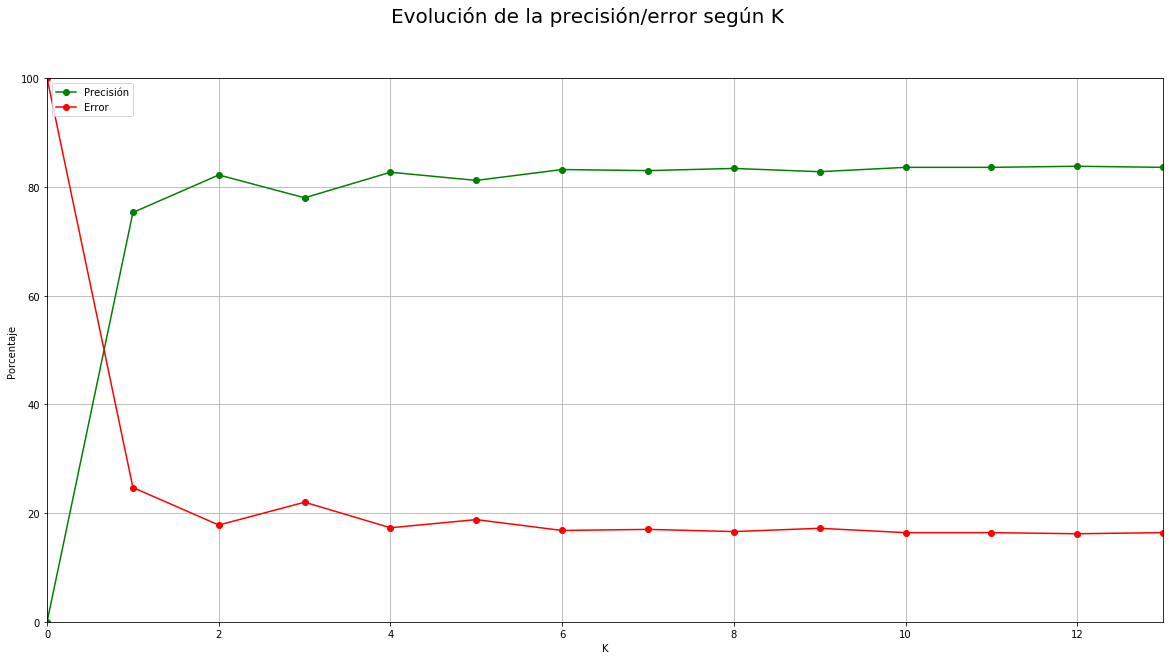

El parámetro K recomendado es: 13 con un 83.8% de precisión para la métrica: chebyshev
############################################################################

Probando división: 0.2
-----


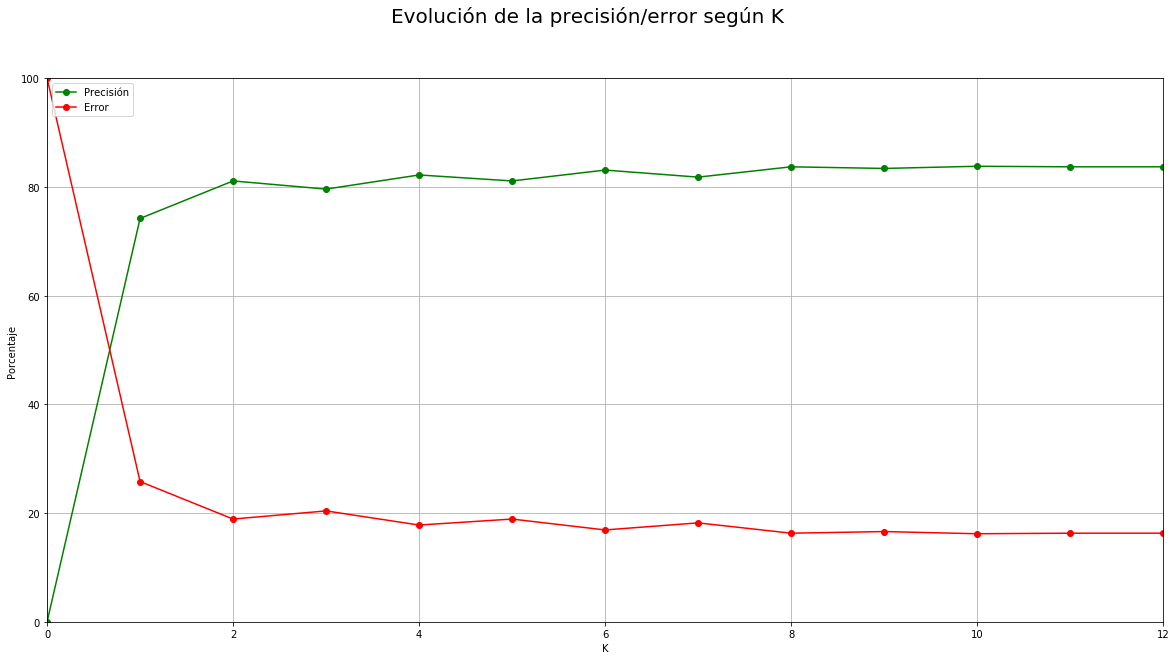

El parámetro K recomendado es: 12 con un 83.7% de precisión para la métrica: euclidean


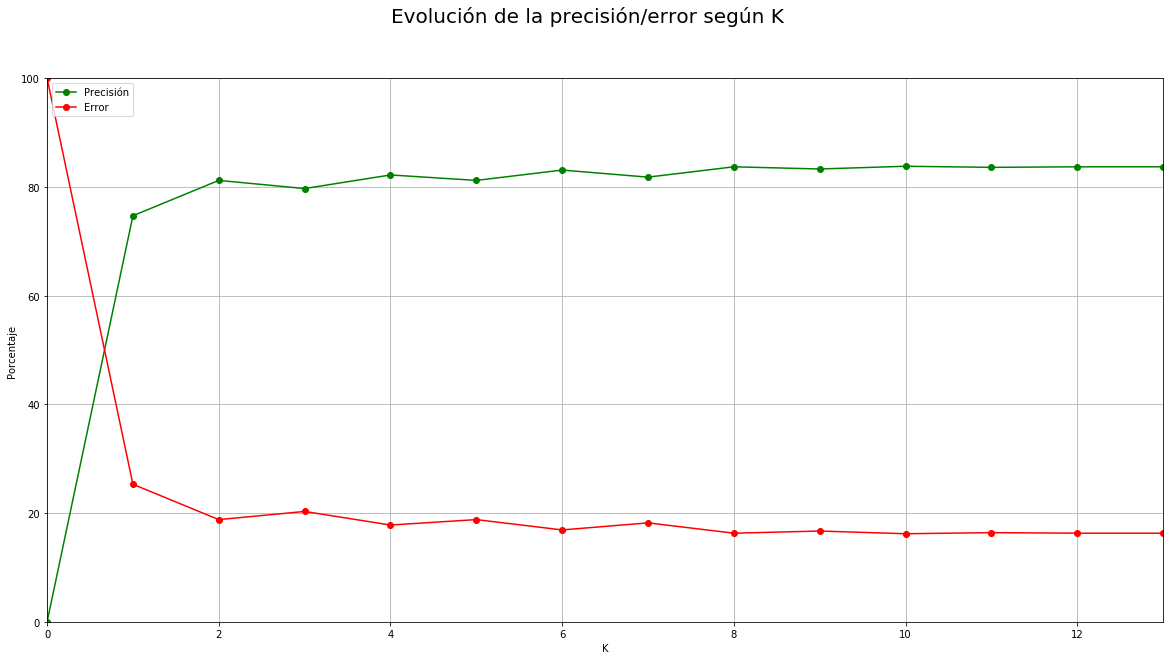

El parámetro K recomendado es: 13 con un 83.7% de precisión para la métrica: manhattan


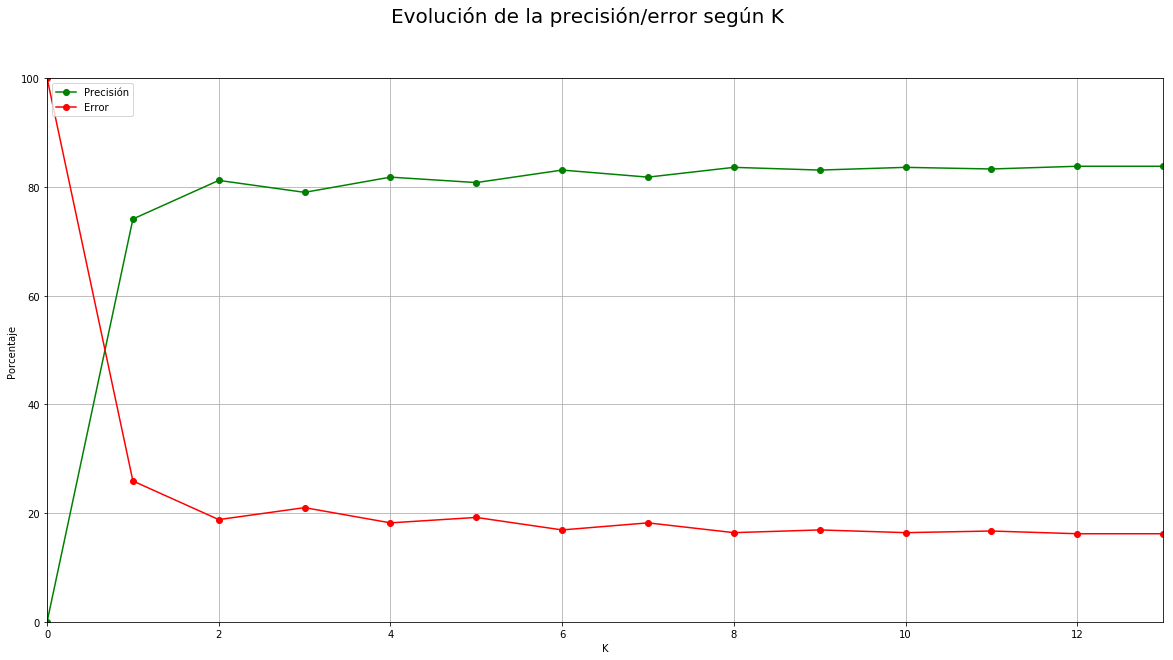

El parámetro K recomendado es: 13 con un 83.8% de precisión para la métrica: chebyshev
############################################################################

Probando división: 0.15
-----


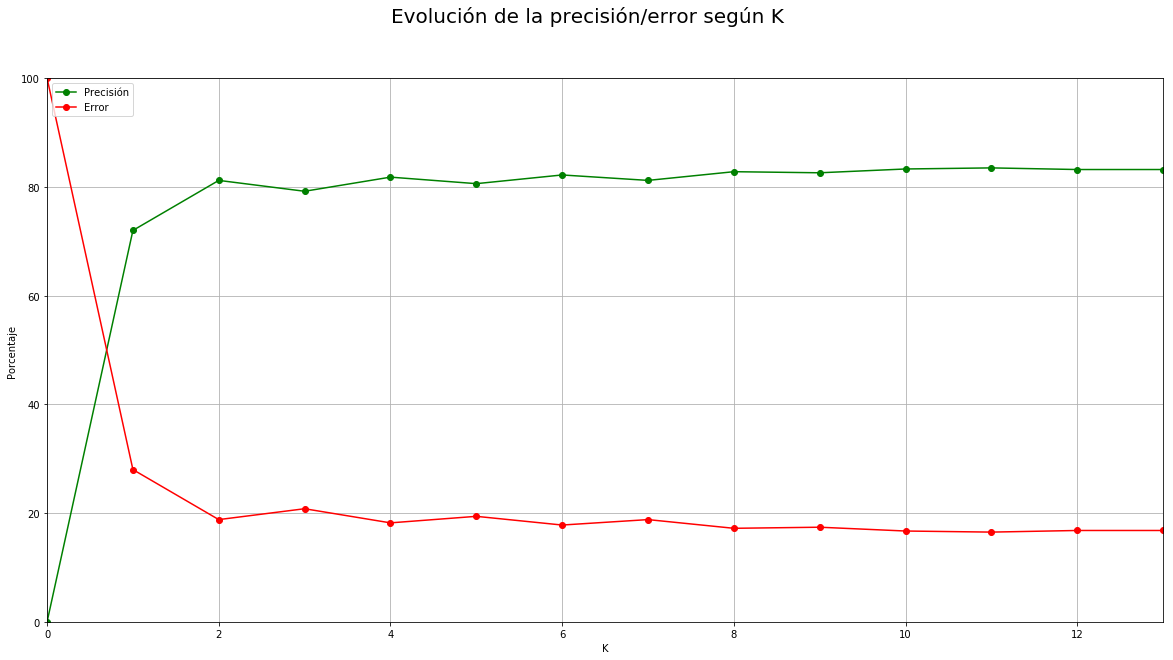

El parámetro K recomendado es: 13 con un 83.2% de precisión para la métrica: euclidean


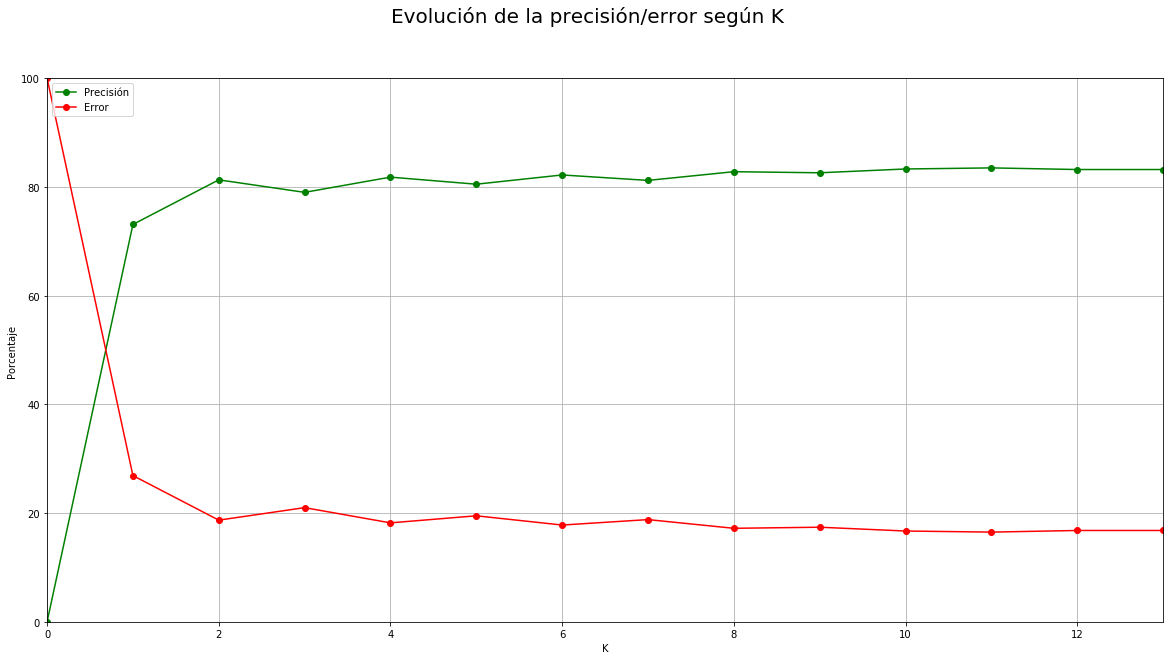

El parámetro K recomendado es: 13 con un 83.2% de precisión para la métrica: manhattan


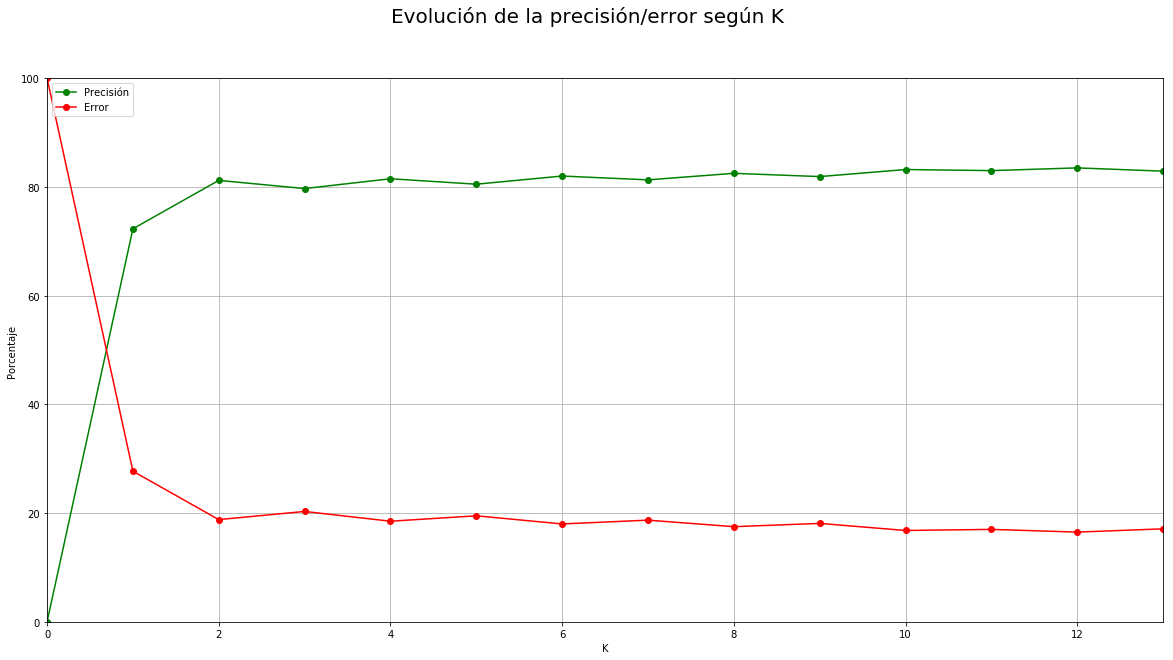

El parámetro K recomendado es: 13 con un 83.5% de precisión para la métrica: chebyshev
############################################################################

Probando división: 0.1
-----


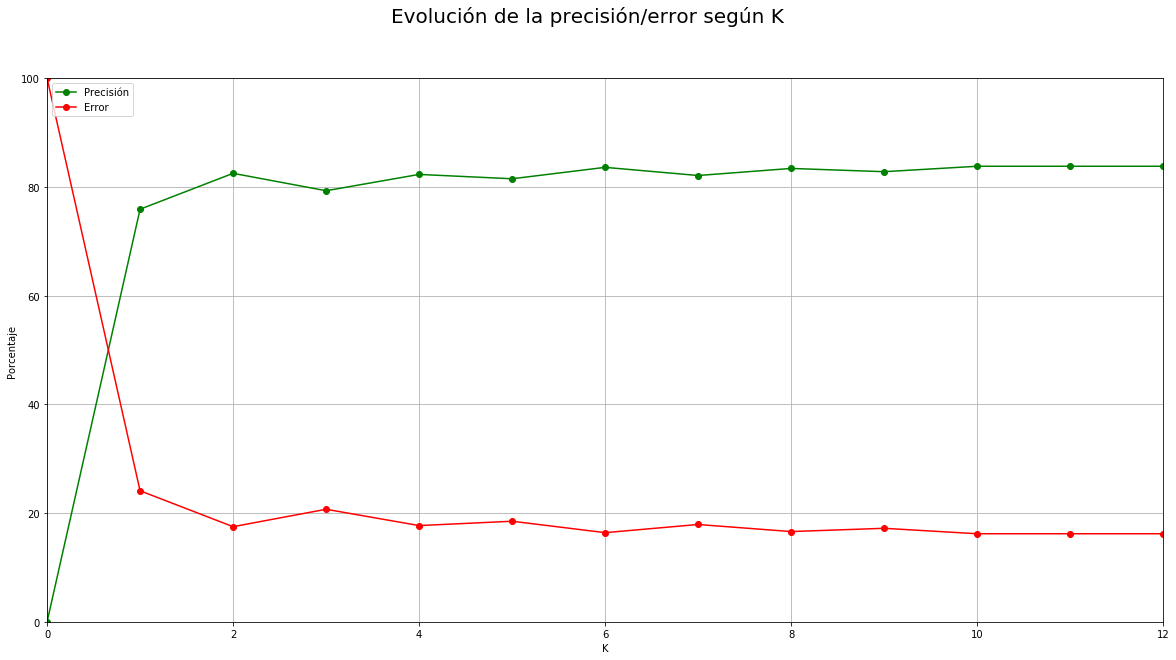

El parámetro K recomendado es: 12 con un 83.8% de precisión para la métrica: euclidean


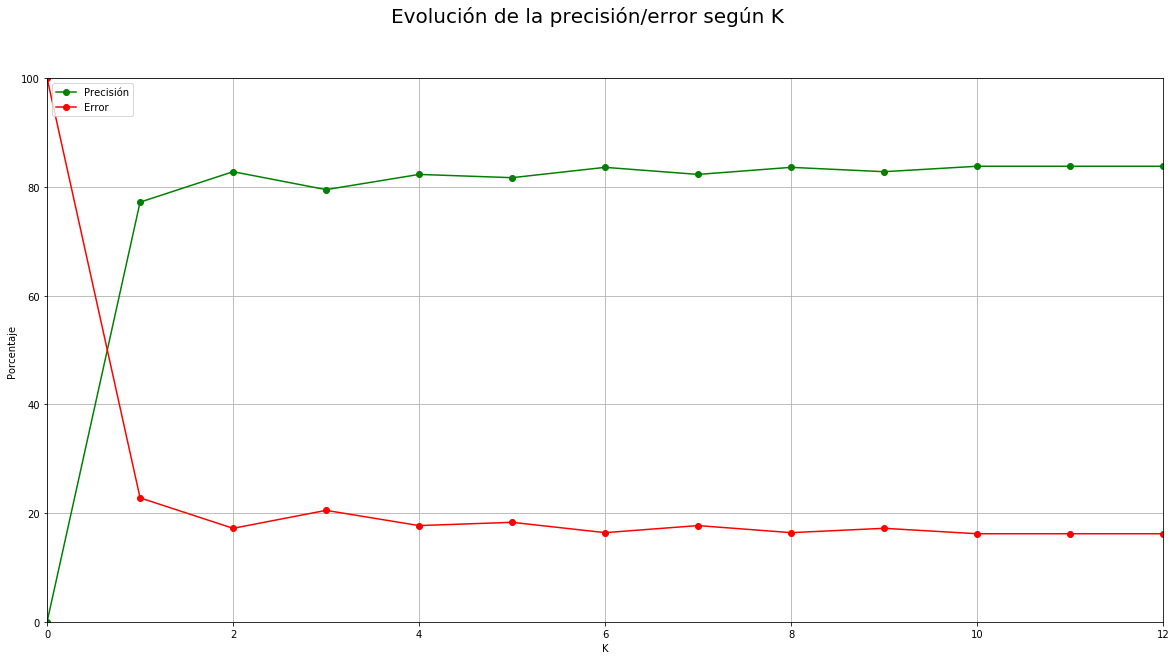

El parámetro K recomendado es: 12 con un 83.8% de precisión para la métrica: manhattan


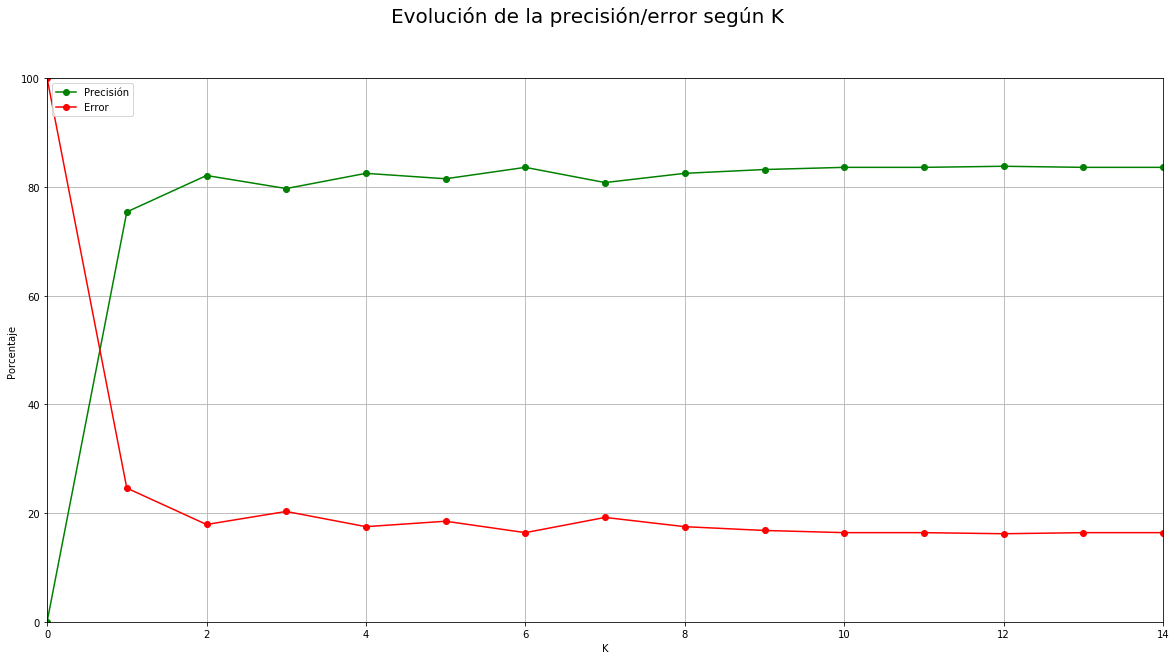

El parámetro K recomendado es: 14 con un 83.6% de precisión para la métrica: chebyshev
############################################################################


In [121]:
metricas = ["euclidean", "manhattan", "chebyshev"]
divisiones = [0.3, 0.25, 0.2, 0.15, 0.1]

for division in divisiones:
    x_entrenam, x_val, y_entrenam, y_val = train_test_split(x_dataset, y_dataset, \
                                                    stratify=y_dataset, test_size=division)
    
    print("")
    print("Probando división: " + str(division))
    print("-----")
    
    for metrica in metricas:
        CrearModeloKNeighborsKOptima(x_entrenam, x_val, y_entrenam, y_val, 0.1, 5, metrica)
        
    print("############################################################################")

La precisión del modelo depende más del parámetro K que del tipo de métrica seleccionada. Crearemos el modelo con la k óptima para la métrica "euclidean" que tiene una precisión del 83.8%.

In [122]:
x_entrenam, x_val, y_entrenam, y_val = train_test_split(x_dataset, y_dataset, stratify=y_dataset, test_size=0.2)

modeloKNN = KNeighborsClassifier(n_neighbors=13, metric="euclidean")
modeloKNN.fit(x_entrenam, y_entrenam)

print("La precisión del modelo final es del: " + str(round(accuracy_score(modeloKNN.predict(x_val), y_val), 3) *100) + "%")

La precisión del modelo final es del: 84.1%


## 4 Probamos los datos con otros asteroides
Guardamos esos asteroides en el csv nasa_clasificar.csv

In [133]:

prueba_x = x_validacion.reset_index()
del prueba_x["index"]
prueba_y = y_validacion.reset_index()
del prueba_y["index"]

In [135]:
import random
for x in range (0, 10):
    y = random.randint(0,len(prueba_x)-1)
    print("y:",y)
    pru_x = prueba_x.iloc[y]
    prediccion = PredecirAsteroide(resultados=modeloKNN.predict_proba([pru_x])[0])
    print("El valor segun los datos es: ", prueba_y.iloc[y])
    print("----------------------------------------------------------------------")

y: 28


,Hazardous,%
0,True,7.7
1,False,92.3


El valor segun los datos es:  Hazardous    0
Name: 28, dtype: int64
----------------------------------------------------------------------
y: 7


,Hazardous,%
0,True,0.0
1,False,100.0


El valor segun los datos es:  Hazardous    0
Name: 7, dtype: int64
----------------------------------------------------------------------
y: 7


,Hazardous,%
0,True,0.0
1,False,100.0


El valor segun los datos es:  Hazardous    0
Name: 7, dtype: int64
----------------------------------------------------------------------
y: 7


,Hazardous,%
0,True,0.0
1,False,100.0


El valor segun los datos es:  Hazardous    0
Name: 7, dtype: int64
----------------------------------------------------------------------
y: 30


,Hazardous,%
0,True,7.7
1,False,92.3


El valor segun los datos es:  Hazardous    0
Name: 30, dtype: int64
----------------------------------------------------------------------
y: 32


,Hazardous,%
0,True,23.1
1,False,76.9


El valor segun los datos es:  Hazardous    1
Name: 32, dtype: int64
----------------------------------------------------------------------
y: 4


,Hazardous,%
0,True,7.7
1,False,92.3


El valor segun los datos es:  Hazardous    0
Name: 4, dtype: int64
----------------------------------------------------------------------
y: 41


,Hazardous,%
0,True,7.7
1,False,92.3


El valor segun los datos es:  Hazardous    1
Name: 41, dtype: int64
----------------------------------------------------------------------
y: 6


,Hazardous,%
0,True,7.7
1,False,92.3


El valor segun los datos es:  Hazardous    0
Name: 6, dtype: int64
----------------------------------------------------------------------
y: 18


,Hazardous,%
0,True,7.7
1,False,92.3


El valor segun los datos es:  Hazardous    0
Name: 18, dtype: int64
----------------------------------------------------------------------
